##### Census Income Project

###### Import Libraries

In [1485]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
%matplotlib inline

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,roc_curve,auc, roc_auc_score,make_scorer
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
#from sklearn.metrics import precision_score, recall_score, precision_recall_fscore_support,f1_score,precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

###### Load Dataset

In [1486]:
pd.pandas.set_option('display.max_columns',None)
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')


###### Dimension Of Data

In [1487]:
df.shape

(32560, 15)

*Observation :*<br>*In dataset there are 32560 rows and 15 columns*

###### Sample of Data

In [1488]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


###### Breif Detail About Data

In [1489]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


*Observation :*<br>*In dataset there are 6 int type and 9 object type columns* 
<br>*In all columns there are 32560 non null values so there are no missing values*

###### Statistical Summary of Data

###### ---for numerical variable

In [1490]:
df.describe(exclude='object')

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


###### ---for categorical variable

In [1491]:
df.describe(include=[object]) 

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


*Observation :*<br>*In Statistical summary of dataset shows that Capital Gain and Capital loss columns*
<br>*std vales is bigger than mean and there quartiles have same values*
<br>*and max values are much higher. so there is outliers and 0 values data*

###### check for unique values in columns

In [1492]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

*Observation :*<br>*In Fnlwgt,Capital_gain,Age,Capital_loss,Hour_per_week,Native_country columns data is countinuous data*
<br>*Rest have categorical type data*

###### check for missing values in columns

In [1493]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [1494]:
print("Total missing values :",df.isnull().sum().sum())

Total missing values : 0


*Observation :*<br>*No Null values*

###### check for duplicate rows

In [1495]:
sum(df.duplicated())

24

*Observation :*<br>*In dataset there are 24 duplicate values*

###### check for zeros in columns

In [1496]:
print(df[df==0].count())
print('Total zeros in Dataset:', df[df==0].count().sum())

Age                   0
Workclass             0
Fnlwgt                0
Education             0
Education_num         0
Marital_status        0
Occupation            0
Relationship          0
Race                  0
Sex                   0
Capital_gain      29849
Capital_loss      31041
Hours_per_week        0
Native_country        0
Income                0
dtype: int64
Total zeros in Dataset: 60890


###### total % of zeros in columns

In [1497]:
print("Total % of Zeros as Value in Columns")
df[df==0].count()/df.shape[0]*100   

Total % of Zeros as Value in Columns


Age                0.000000
Workclass          0.000000
Fnlwgt             0.000000
Education          0.000000
Education_num      0.000000
Marital_status     0.000000
Occupation         0.000000
Relationship       0.000000
Race               0.000000
Sex                0.000000
Capital_gain      91.673833
Capital_loss      95.334767
Hours_per_week     0.000000
Native_country     0.000000
Income             0.000000
dtype: float64

*Observation :*<br>*Capital_gain and Capital_loss columns have 0 value data*
<br>*Capital_gain column have 91% and Capital_loss column have 95% zero values data*

###### Identification of variables

###### check for numerical variables

In [1498]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  6


In [1499]:
for feature in numerical_features:
    print('The feature is {} and number of numerical are {}'.format(feature,len(df[feature].unique())))

The feature is Age and number of numerical are 73
The feature is Fnlwgt and number of numerical are 21647
The feature is Education_num and number of numerical are 16
The feature is Capital_gain and number of numerical are 119
The feature is Capital_loss and number of numerical are 92
The feature is Hours_per_week and number of numerical are 94


In [1500]:
df[numerical_features].head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


###### ---check for descrete variable

In [1501]:
descrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Descrete Variables Count: {}".format(len(descrete_feature)),"\n")

for feature in descrete_feature:
    print('The feature is {} and number of numerical are {}'.format(feature,len(df[feature].unique())))
    
    
for feature in descrete_feature:
    print("\n",feature," : ", df[feature].unique())

Descrete Variables Count: 1 

The feature is Education_num and number of numerical are 16

 Education_num  :  [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


In [1502]:
df[descrete_feature].head()

,Education_num
0,13
1,9
2,7
3,13
4,14


###### ---check for continuous variable

In [1503]:
continuous_feature=[feature for feature in numerical_features if feature not in descrete_feature ]
print("Continuous Variables Count {}".format(len(continuous_feature)),"\n")

for feature in continuous_feature:
    print('The feature is:  {}     and number of numerical are:  {}'.format(feature,len(df[feature].unique())))

Continuous Variables Count 5 

The feature is:  Age     and number of numerical are:  73
The feature is:  Fnlwgt     and number of numerical are:  21647
The feature is:  Capital_gain     and number of numerical are:  119
The feature is:  Capital_loss     and number of numerical are:  92
The feature is:  Hours_per_week     and number of numerical are:  94


In [1504]:
df[continuous_feature].head()

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,0,0,13
1,38,215646,0,0,40
2,53,234721,0,0,40
3,28,338409,0,0,40
4,37,284582,0,0,40


*Observation :*<br>*In dataset Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week columns are numerical variables*<br>*Education_num coulumn is discrete and rest are continuous*

###### check for categorical variable

In [1505]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
print('Number of Categorical variables: ', len(categorical_features))

Number of Categorical variables:  9


In [1506]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Workclass and number of categories are 9
The feature is Education and number of categories are 16
The feature is Marital_status and number of categories are 7
The feature is Occupation and number of categories are 15
The feature is Relationship and number of categories are 6
The feature is Race and number of categories are 5
The feature is Sex and number of categories are 2
The feature is Native_country and number of categories are 42
The feature is Income and number of categories are 2


In [1507]:
df[categorical_features].head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


###### ---check for binary variable

In [1508]:
binary_feature=[feature for feature in categorical_features if len(df[feature].unique())==2 or len(df[feature].unique())<2 and feature not in date_feature]
print("Binary Variables Count: {}".format(len(binary_feature)))

Binary Variables Count: 2


In [1509]:
for feature in binary_feature:
    print(feature," : ", df[feature].unique())

Sex  :  [' Male' ' Female']
Income  :  [' <=50K' ' >50K']


In [1510]:
df[binary_feature].head()

,Sex,Income
0,Male,<=50K
1,Male,<=50K
2,Male,<=50K
3,Female,<=50K
4,Female,<=50K


###### ---check for nominal variable

In [1511]:
nominal_feature=[feature for feature in categorical_features if feature not in binary_feature]
print("Nominal feature Count {}".format(len(nominal_feature)))

Nominal feature Count 7


In [1512]:
for feature in nominal_feature:
    print('The feature is {} and number of numerical are {}'.format(feature,len(df[feature].unique())))

The feature is Workclass and number of numerical are 9
The feature is Education and number of numerical are 16
The feature is Marital_status and number of numerical are 7
The feature is Occupation and number of numerical are 15
The feature is Relationship and number of numerical are 6
The feature is Race and number of numerical are 5
The feature is Native_country and number of numerical are 42


In [1513]:
df[nominal_feature].head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Native_country
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,United-States
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,United-States
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,United-States
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Cuba
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,United-States


*Observation :*<br>*In dataset Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income categorical variables*
<br>*Sex and Income column are binary,Education and Marital_status is ordinal and rest are nominal*

###### check for cardinality

###### ---for categorical variables

Text(0.5, 1.0, 'Cardinality')

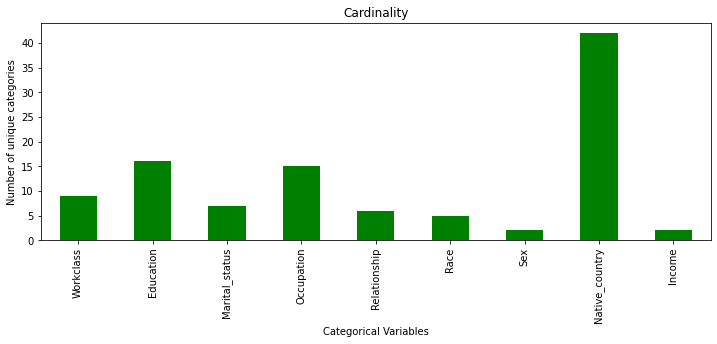

In [1514]:
df[categorical_features].nunique().plot.bar(figsize=(12,4),color='green')
plt.ylabel('Number of unique categories')
plt.xlabel('Categorical Variables')
plt.title('Cardinality')

*Observation :*<br>*In dataset Workclass,Education,Occupation,Native_country columns have high cardinality*
<br>*Sex and Income column have low cardinality but Marital_status,Relationship,Race have medium cardinality*

###### check for outliers

###### ---for numerical variables

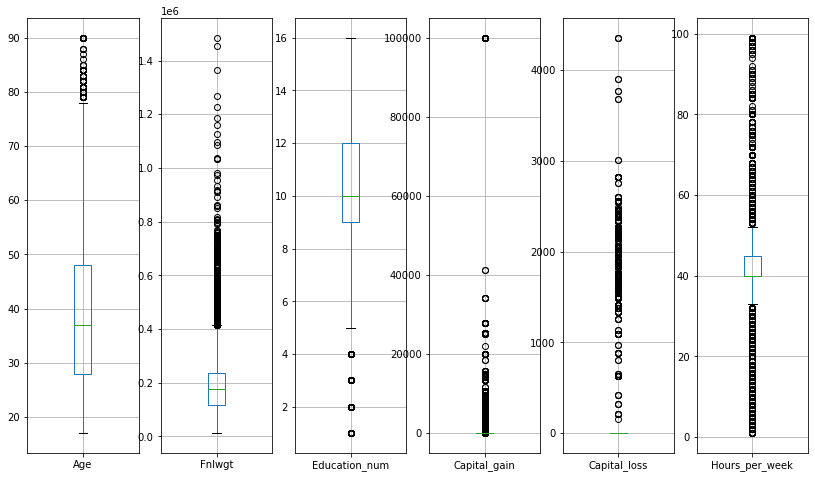

In [1515]:
fig, pltcan=plt.subplots(nrows=1, ncols=len(numerical_features), figsize=(14,8))
for predcol , i in zip(numerical_features, range(len(numerical_features))):
    df.boxplot(column=predcol, figsize=(2,10), vert=True, ax=pltcan[i])

*Observation :*<br>*All columns have outliers but Education_num have very less outliers*

###### check for skewness

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64


<AxesSubplot:>

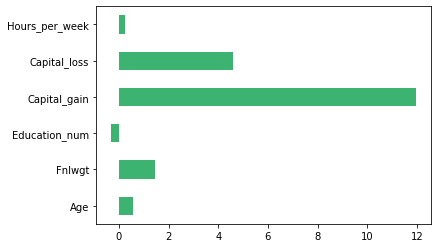

In [1516]:
print(df.skew())
df.skew().plot(kind='barh',color='mediumseagreen')

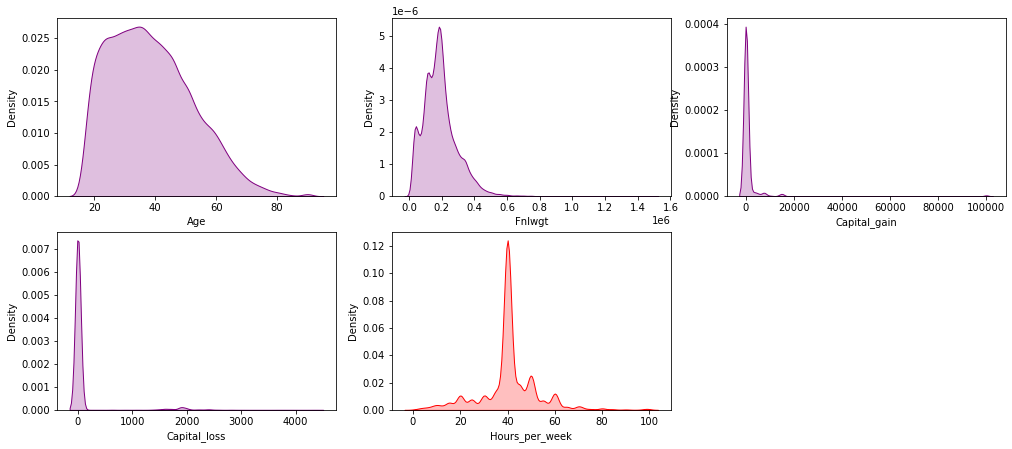

In [1517]:
#Visualization of Skewness (numerical variable)
plt.figure(figsize=(17,19))
plt.subplot(5,3,1)
sns.kdeplot(df['Age'],color='purple',shade=True)
plt.subplot(5,3,2)
sns.kdeplot(df['Fnlwgt'],color='purple',shade=True)
plt.subplot(5,3,3)
sns.kdeplot(df['Capital_gain'],color='purple',shade=True)
plt.subplot(5,3,4)
sns.kdeplot(df['Capital_loss'],color='purple',shade=True)
plt.subplot(5,3,5)
sns.kdeplot(df['Hours_per_week'],color='red',shade=True)
plt.show()


*Observation :*<br>*All columns have very little right skewness*

###### Identify Target And Feature Variables

*Prediction-*<br>*Income per person (>=<$50k)*

*Targe Variable (Depaendent Features)* <br>            *-Income* <br>
*Predictors (Independent Features)*<br>                 - All variables* 

###### Univariate Analysis

###### 1. Income variable 

<AxesSubplot:ylabel='Income'>

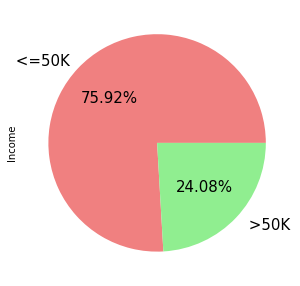

In [1518]:
df['Income'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=15,figsize=(5,5),colors = ['lightcoral', 'lightgreen'])

*Observation :*<br>*max people have salary less than 50K and less people have >50K*

###### 2. Education, Workclass, Occupation variable

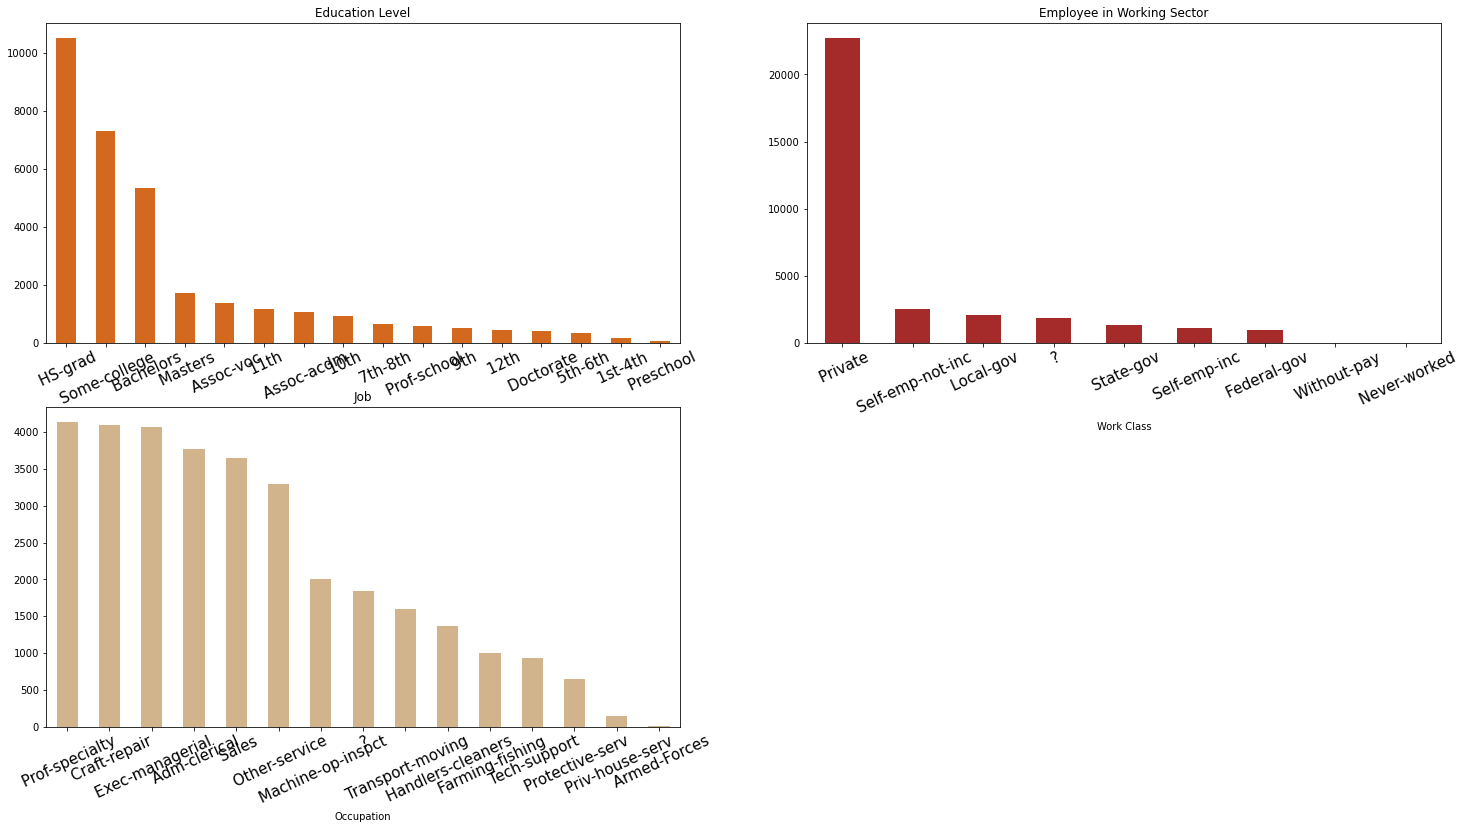

In [1519]:
plt.subplot(321)
df['Education'].value_counts().plot(kind='bar', title='Education Level', figsize=(25,20),color='chocolate')
plt.xticks(rotation=25, fontsize=15)
plt.subplot(322)
plt.xlabel('Education')
df['Workclass'].value_counts().plot(kind='bar', title='Employee in Working Sector', figsize=(25,23),color='brown')
plt.xticks(rotation=25,fontsize=15)
plt.xlabel('Work Class')
plt.subplot(323)
df['Occupation'].value_counts().plot(kind='bar', title='Job', figsize=(25,20),color='tan')
plt.xticks(rotation=25, fontsize=15)
plt.xlabel('Occupation')
plt.show()

*Observation :*<br>*Max people have HS Education afetr that bachelor and Masters.*<br>*Very less people are only primary have education*<br>*Column Workclass shows people employement in different sector*<br>*It shows the max people employeed in private sector*<br>*Question(?) mark need to be change with the Other option*<br>*Professional,Craft,Manager,Sales,Administration jobs are maximum employee*

###### 3. Marital_status, Relationship, Sex  variable

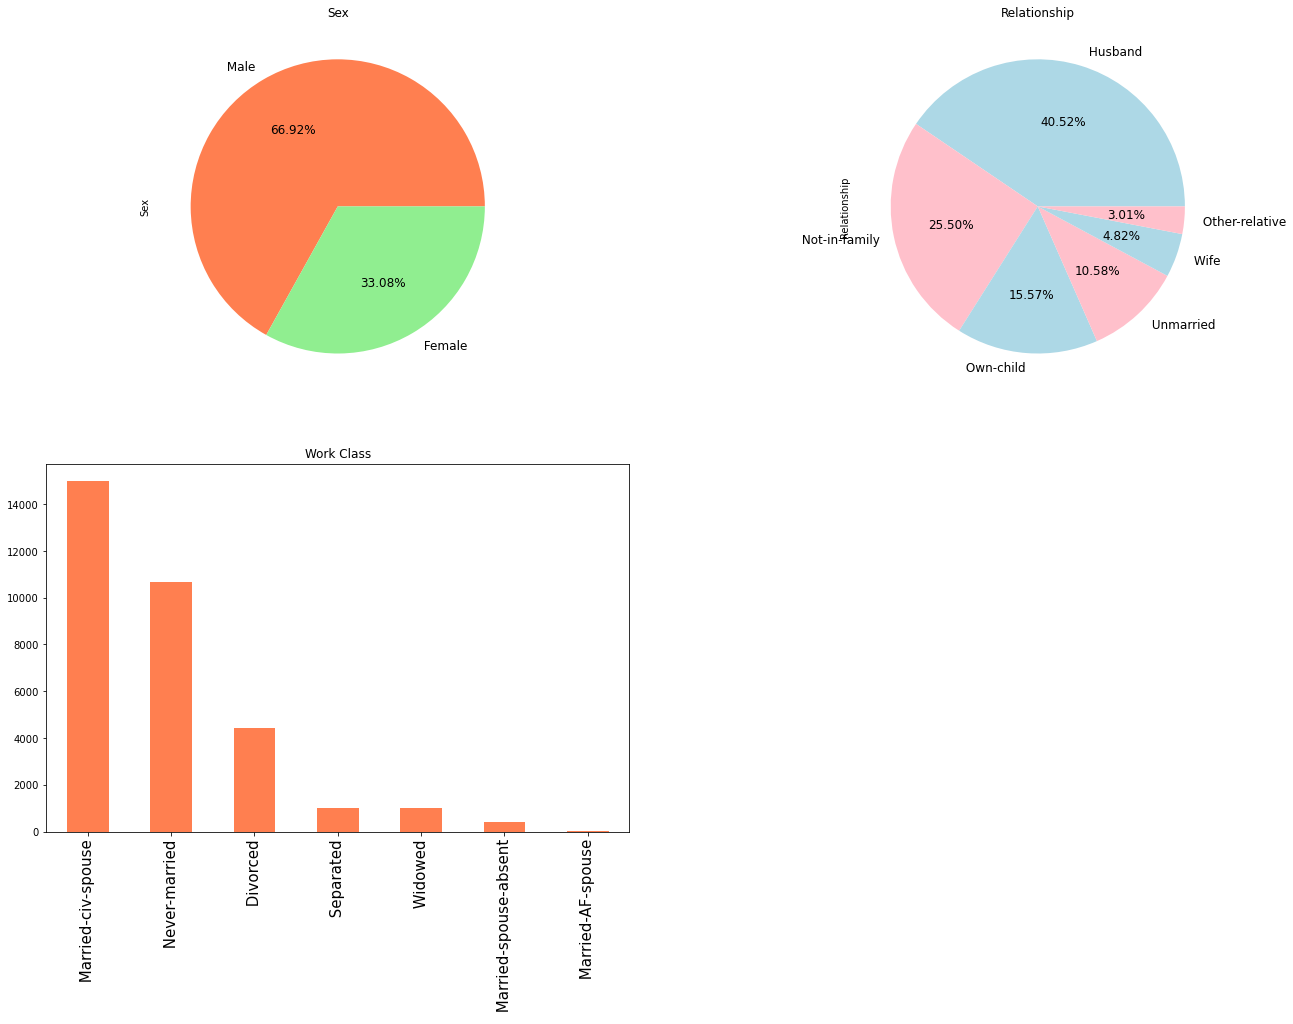

In [1520]:
plt.subplot(321)
df['Sex'].value_counts().plot(kind = "pie",title='Sex',autopct='%1.2f%%',fontsize=12,figsize=(25,25),colors = ['coral', 'lightgreen'])
plt.subplot(322)
df['Relationship'].value_counts().plot(kind = "pie",title='Relationship',autopct='%1.2f%%',fontsize=12,figsize=(25,25),colors = ['lightblue', 'pink'])
plt.subplot(323)
df['Marital_status'].value_counts().plot(kind='bar', title='Work Class', figsize=(23,23),color='coral')
plt.xticks(rotation=90,fontsize=15)
plt.show()

*Observation :*<br>*max % of male are employeed*<br>*In relationship HUsbands have max %*<br>*Married % is higher*<br>*Married-civ-spouse,Married-spouse-abscent,Married-AF-spouse need to be marged as married*

###### 4. Native_country,Race variable

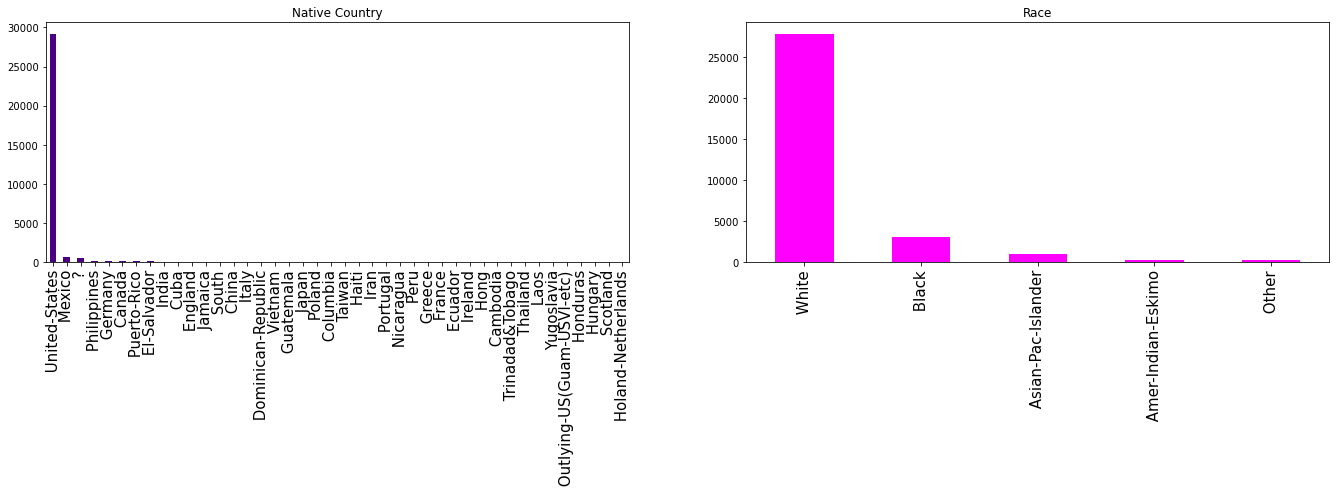

In [1521]:
plt.subplot(321)
df['Native_country'].value_counts().plot(kind='bar', title='Native Country', figsize=(23,15),color='indigo')
plt.xticks(rotation=90,fontsize=15)
plt.subplot(322)
df['Race'].value_counts().plot(kind='bar', title='Race', figsize=(23,15),color='magenta')
plt.xticks(rotation=90,fontsize=15)
plt.show()

*Observation :*<br>*In native country US have highest range*<br>*In race White have highest range*

###### 5. Age, Fnlwgt(final weight), Education_num variable 

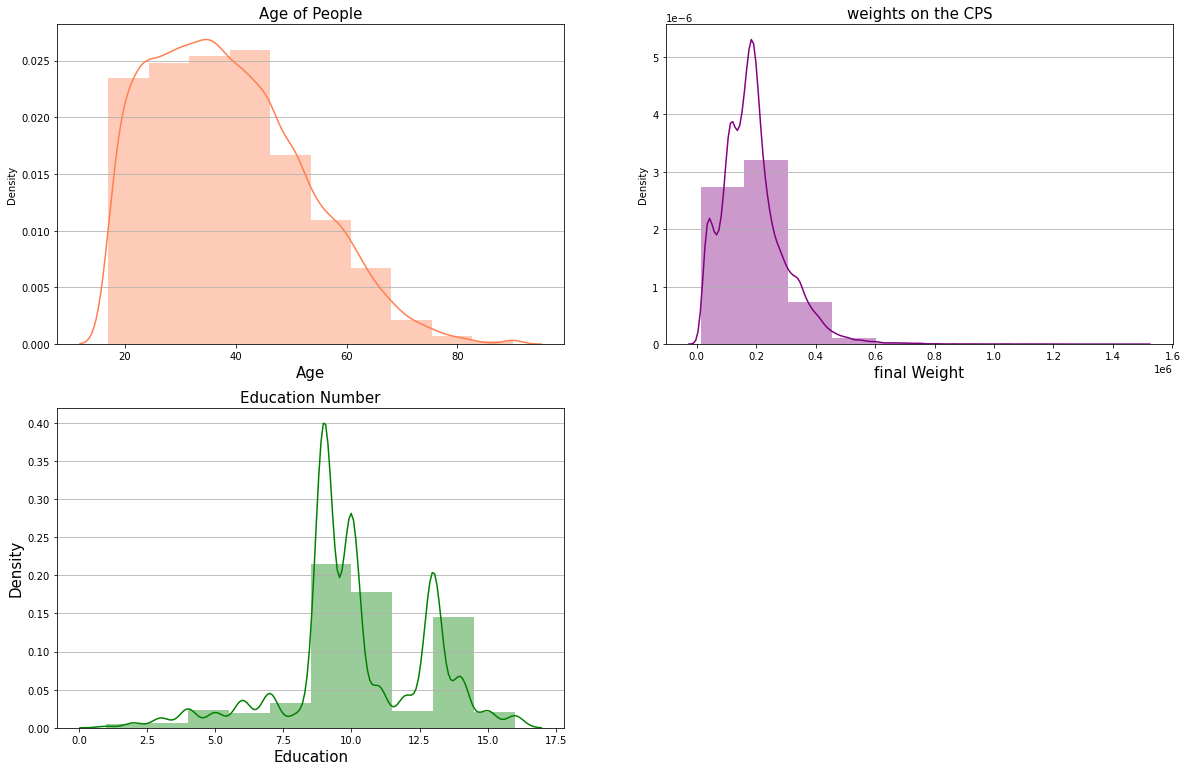

In [1522]:
plt.figure(figsize=(20,20))
plt.subplot(321)
sns.distplot(df['Age'],hist = True, bins=10, kde=True, color='coral')
plt.title("Age of People", fontsize=15)
plt.xlabel('Age', fontsize=15)
plt.grid(axis='y')
plt.subplot(322)
sns.distplot(df['Fnlwgt'],hist = True, bins=10, kde=True, color='purple')
plt.title("weights on the CPS", fontsize=15)
plt.xlabel('final Weight', fontsize=15)
plt.grid(axis='y')
plt.subplot(323)
sns.distplot(df['Education_num'],hist = True, bins=10, kde=True, color='green')
plt.title("Education Number", fontsize=15)
plt.xlabel('Education', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.grid(axis='y')

*Observation :*<br>*Max people are in the range of age 18 to 45*
<br>*final weight is highest in the range between .1 to .3*
<br>*Education number is max in the range between 8 to 11*

###### 6. Capital_gain, Capital_loss, Hours_per_week variable

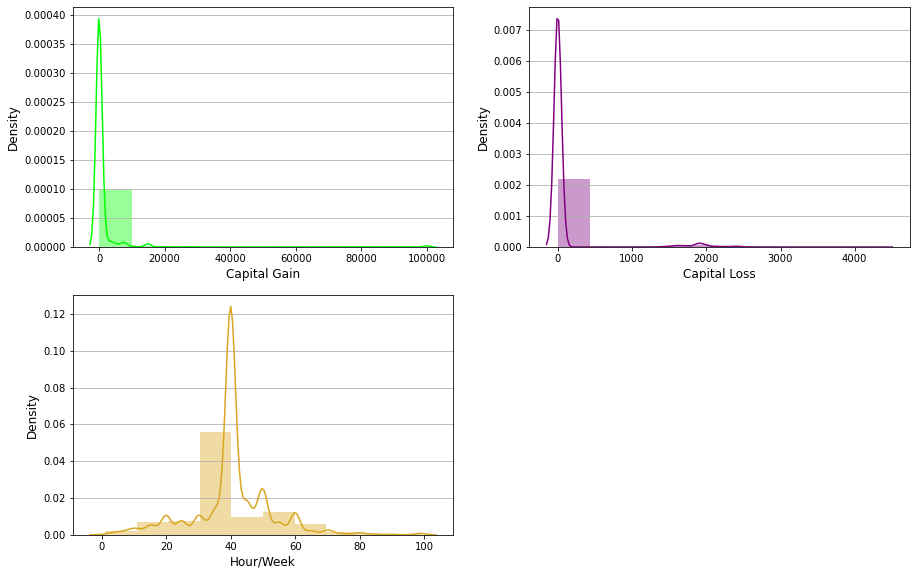

In [1523]:
plt.figure(figsize=(15,15))
plt.subplot(321)
sns.distplot(df['Capital_gain'],hist = True, bins=10, kde=True, color='lime')
plt.xlabel('Capital Gain', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(axis='y')
plt.subplot(322)
sns.distplot(df['Capital_loss'],hist = True, bins=10, kde=True, color='purple')
plt.xlabel('Capital Loss', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(axis='y')
plt.subplot(323)
sns.distplot(df['Hours_per_week'],hist = True, bins=10, kde=True, color='goldenrod')
plt.xlabel('Hour/Week', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(axis='y')

*Observation :*<br>*Capital gain max in in the range of 0 to 10000*
<br>*Capital loss is max in the range of 0 to 500*<br>*Hr/week is highest in the range of 30 to 40*

###### Bivariate Analysis

###### 1.---Categorical and Numerical variable

###### Income 
          vs Age
          vs Final Weight
          vs Education Number
          vs Capital gain
          vs Capital_loss
          vs Hours per week

Text(0, 0.5, 'Hours per week')

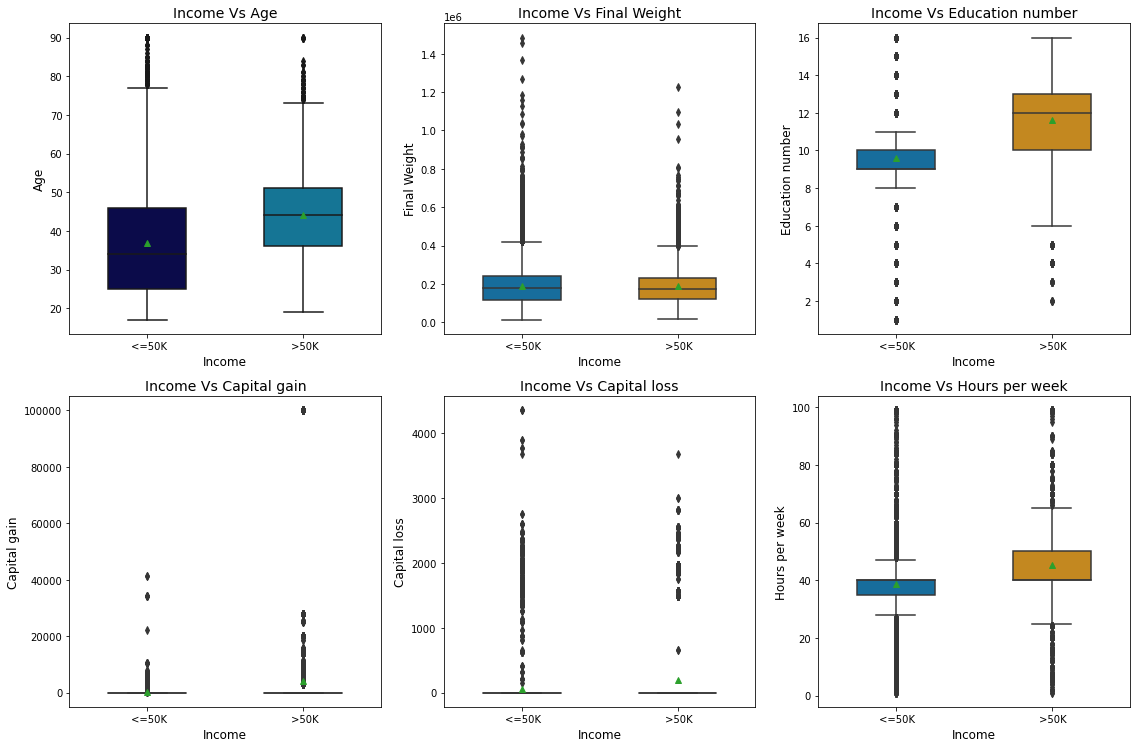

In [1420]:
plt.figure(figsize=(19,40))
plt.subplot(6,3,1)
boxplot = sns.boxplot(x ='Income',y='Age',data=df,showmeans=True,width=0.5,palette="ocean")
plt.title("Income Vs Age", fontsize=14)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.subplot(6,3,2)
boxplot = sns.boxplot(x ='Income',y='Fnlwgt',data=df,showmeans=True,width=0.5,palette="colorblind")
plt.title("Income Vs Final Weight", fontsize=14)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Final Weight', fontsize=12)
plt.subplot(6,3,3)
boxplot = sns.boxplot(x ='Income',y='Education_num',data=df,showmeans=True,width=0.5,palette="colorblind")
plt.title("Income Vs Education number", fontsize=14)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Education number', fontsize=12)
plt.subplot(6,3,4)
boxplot = sns.boxplot(x ='Income',y='Capital_gain',data=df,showmeans=True,width=0.5,palette="colorblind")
plt.title("Income Vs Capital gain", fontsize=14)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Capital gain', fontsize=12)
plt.subplot(6,3,5)
boxplot = sns.boxplot(x ='Income',y='Capital_loss',data=df,showmeans=True,width=0.5,palette="colorblind")
plt.title("Income Vs Capital loss", fontsize=14)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Capital loss', fontsize=12)
plt.subplot(6,3,6)
boxplot = sns.boxplot(x ='Income',y='Hours_per_week',data=df,showmeans=True,width=0.5,palette="colorblind")
plt.title("Income Vs Hours per week", fontsize=14)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Hours per week', fontsize=12)

*Observation :*<br>
*Income <=50k people age is in the range approx 25 to 45 and >50k Income people age is in the range approx 38 to 50*
<br>*Final Weight is same for both range of income people*<br>
*Income <=50k people Education number is less than 10 and >50k income people Education number is above 10*
<br>*Capital gain is same for both income people*
<br>*CApital loss is same for both income people*
<br>*hr/week is less than 40 for <=50k income people and it is above 40 for >50k income people*

###### 2.---Both Categorical

###### Income 
            Vs Workclass
            Vs Education
            Vs Marital_status
            Vs Occupation
            Vs Relationship
            Vs Race
            Vs Sex
            Vs Native_country

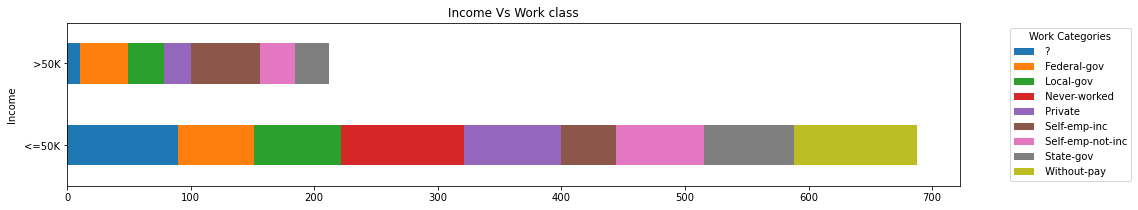

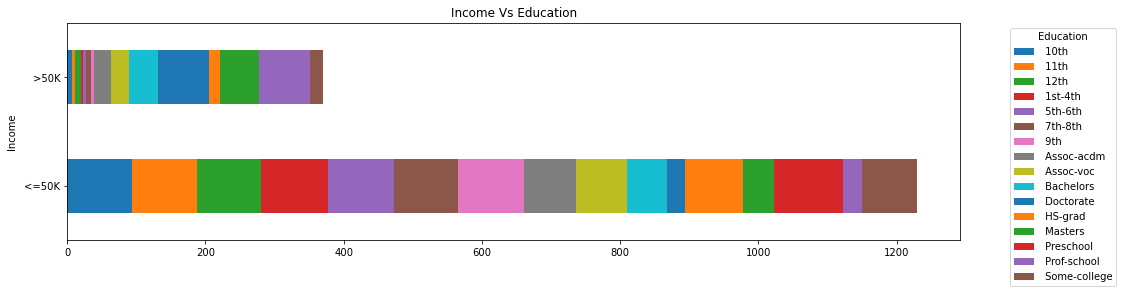

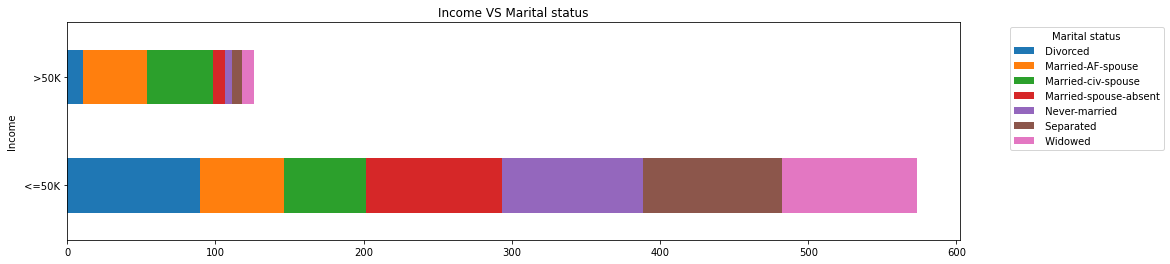

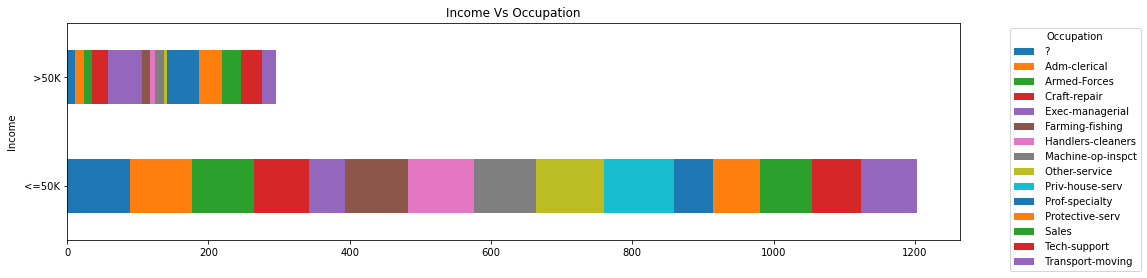

In [1421]:
temp=pd.crosstab(df['Income'],df['Workclass'],dropna = False,normalize = 'columns').round(3)*100
temp.plot(kind='barh', stacked=True, grid=False,title = 'Income Vs Work class', mark_right = True,figsize=(16,3))
plt.legend(title = 'Work Categories',bbox_to_anchor=(1.05, 1), loc='upper left')
temp=pd.crosstab(df['Income'],df['Education'],dropna = False,normalize = 'columns').round(3)*100
temp.plot(kind='barh', stacked=True, grid=False,title = 'Income Vs Education', mark_right = True,figsize=(16,4))
plt.legend(title = 'Education',bbox_to_anchor=(1.05, 1), loc='upper left')
temp=pd.crosstab(df['Income'],df['Marital_status'],dropna = False,normalize = 'columns').round(3)*100
temp.plot(kind='barh', stacked=True, grid=False,title = 'Income VS Marital status', mark_right = True,figsize=(16,4))
plt.legend(title = 'Marital status',bbox_to_anchor=(1.05, 1), loc='upper left')
temp=pd.crosstab(df['Income'],df['Occupation'],dropna = False,normalize = 'columns').round(3)*100
temp.plot(kind='barh', stacked=True, grid=False,title = 'Income Vs Occupation', mark_right = True,figsize=(16,4))
plt.legend(title = 'Occupation',bbox_to_anchor=(1.05, 1), loc='upper left')


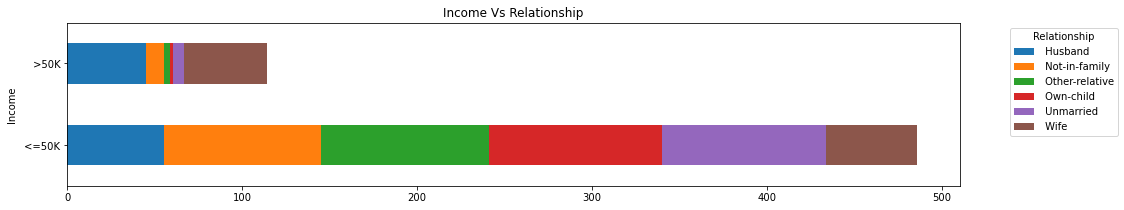

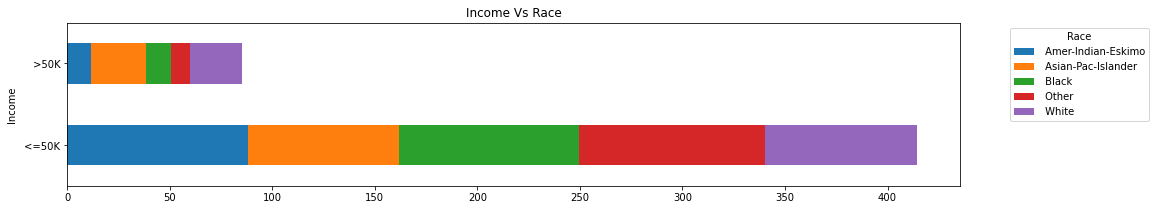

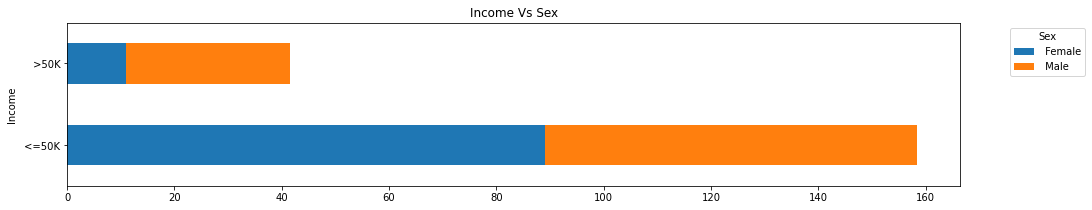

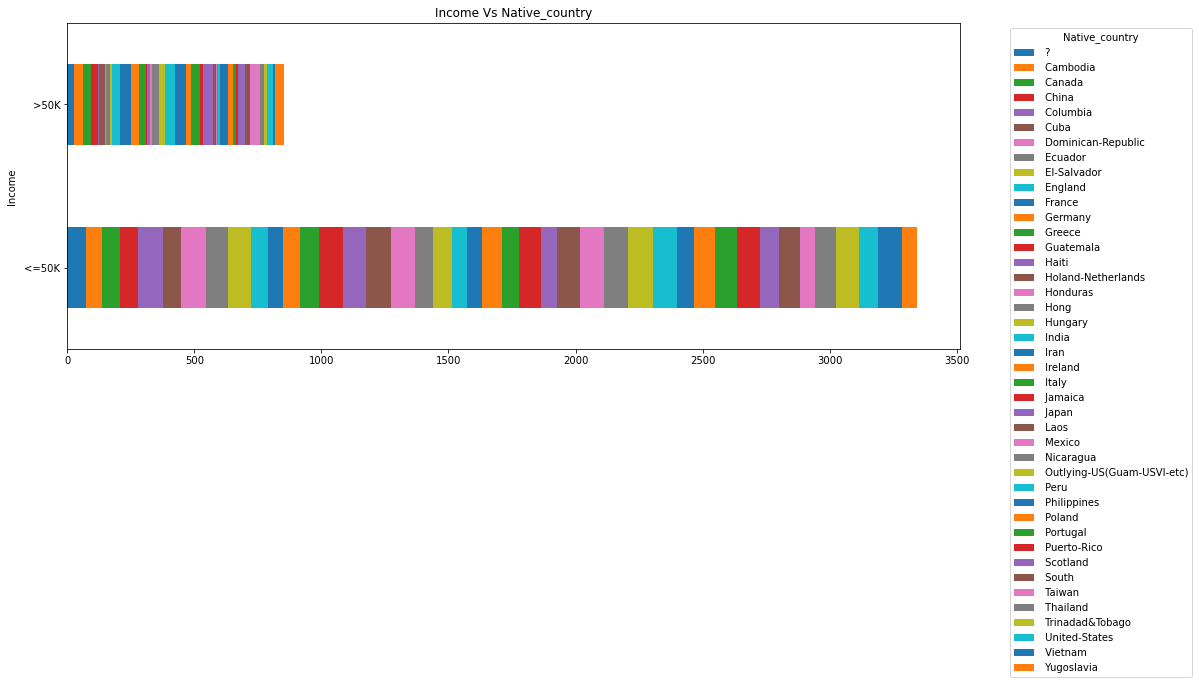

In [1422]:
temp=pd.crosstab(df['Income'],df['Relationship'],dropna = False,normalize = 'columns').round(3)*100
temp.plot(kind='barh', stacked=True, grid=False,title = 'Income Vs Relationship', mark_right = True,figsize=(16,3))
plt.legend(title = 'Relationship',bbox_to_anchor=(1.05, 1), loc='upper left')
temp=pd.crosstab(df['Income'],df['Race'],dropna = False,normalize = 'columns').round(3)*100
temp.plot(kind='barh', stacked=True, grid=False,title = 'Income Vs Race', mark_right = True,figsize=(16,3))
plt.legend(title = 'Race',bbox_to_anchor=(1.05, 1), loc='upper left')
temp=pd.crosstab(df['Income'],df['Sex'],dropna = False,normalize = 'columns').round(3)*100
temp.plot(kind='barh', stacked=True, grid=False,title = 'Income Vs Sex', mark_right = True,figsize=(16,3))
plt.legend(title = 'Sex',bbox_to_anchor=(1.05, 1), loc='upper left')
temp=pd.crosstab(df['Income'],df['Native_country'],dropna = False,normalize = 'columns').round(3)*100
temp.plot(kind='barh', stacked=True, grid=False,title = 'Income Vs Native_country', mark_right = True,figsize=(16,6))
plt.legend(title = 'Native_country',bbox_to_anchor=(1.05, 1), loc='upper left')


In [1263]:
#3.Numerical Vs NUmerical and #  Categorical Vs Categorical

(array([-25.,   0.,  25.,  50.,  75., 100., 125.]), [])

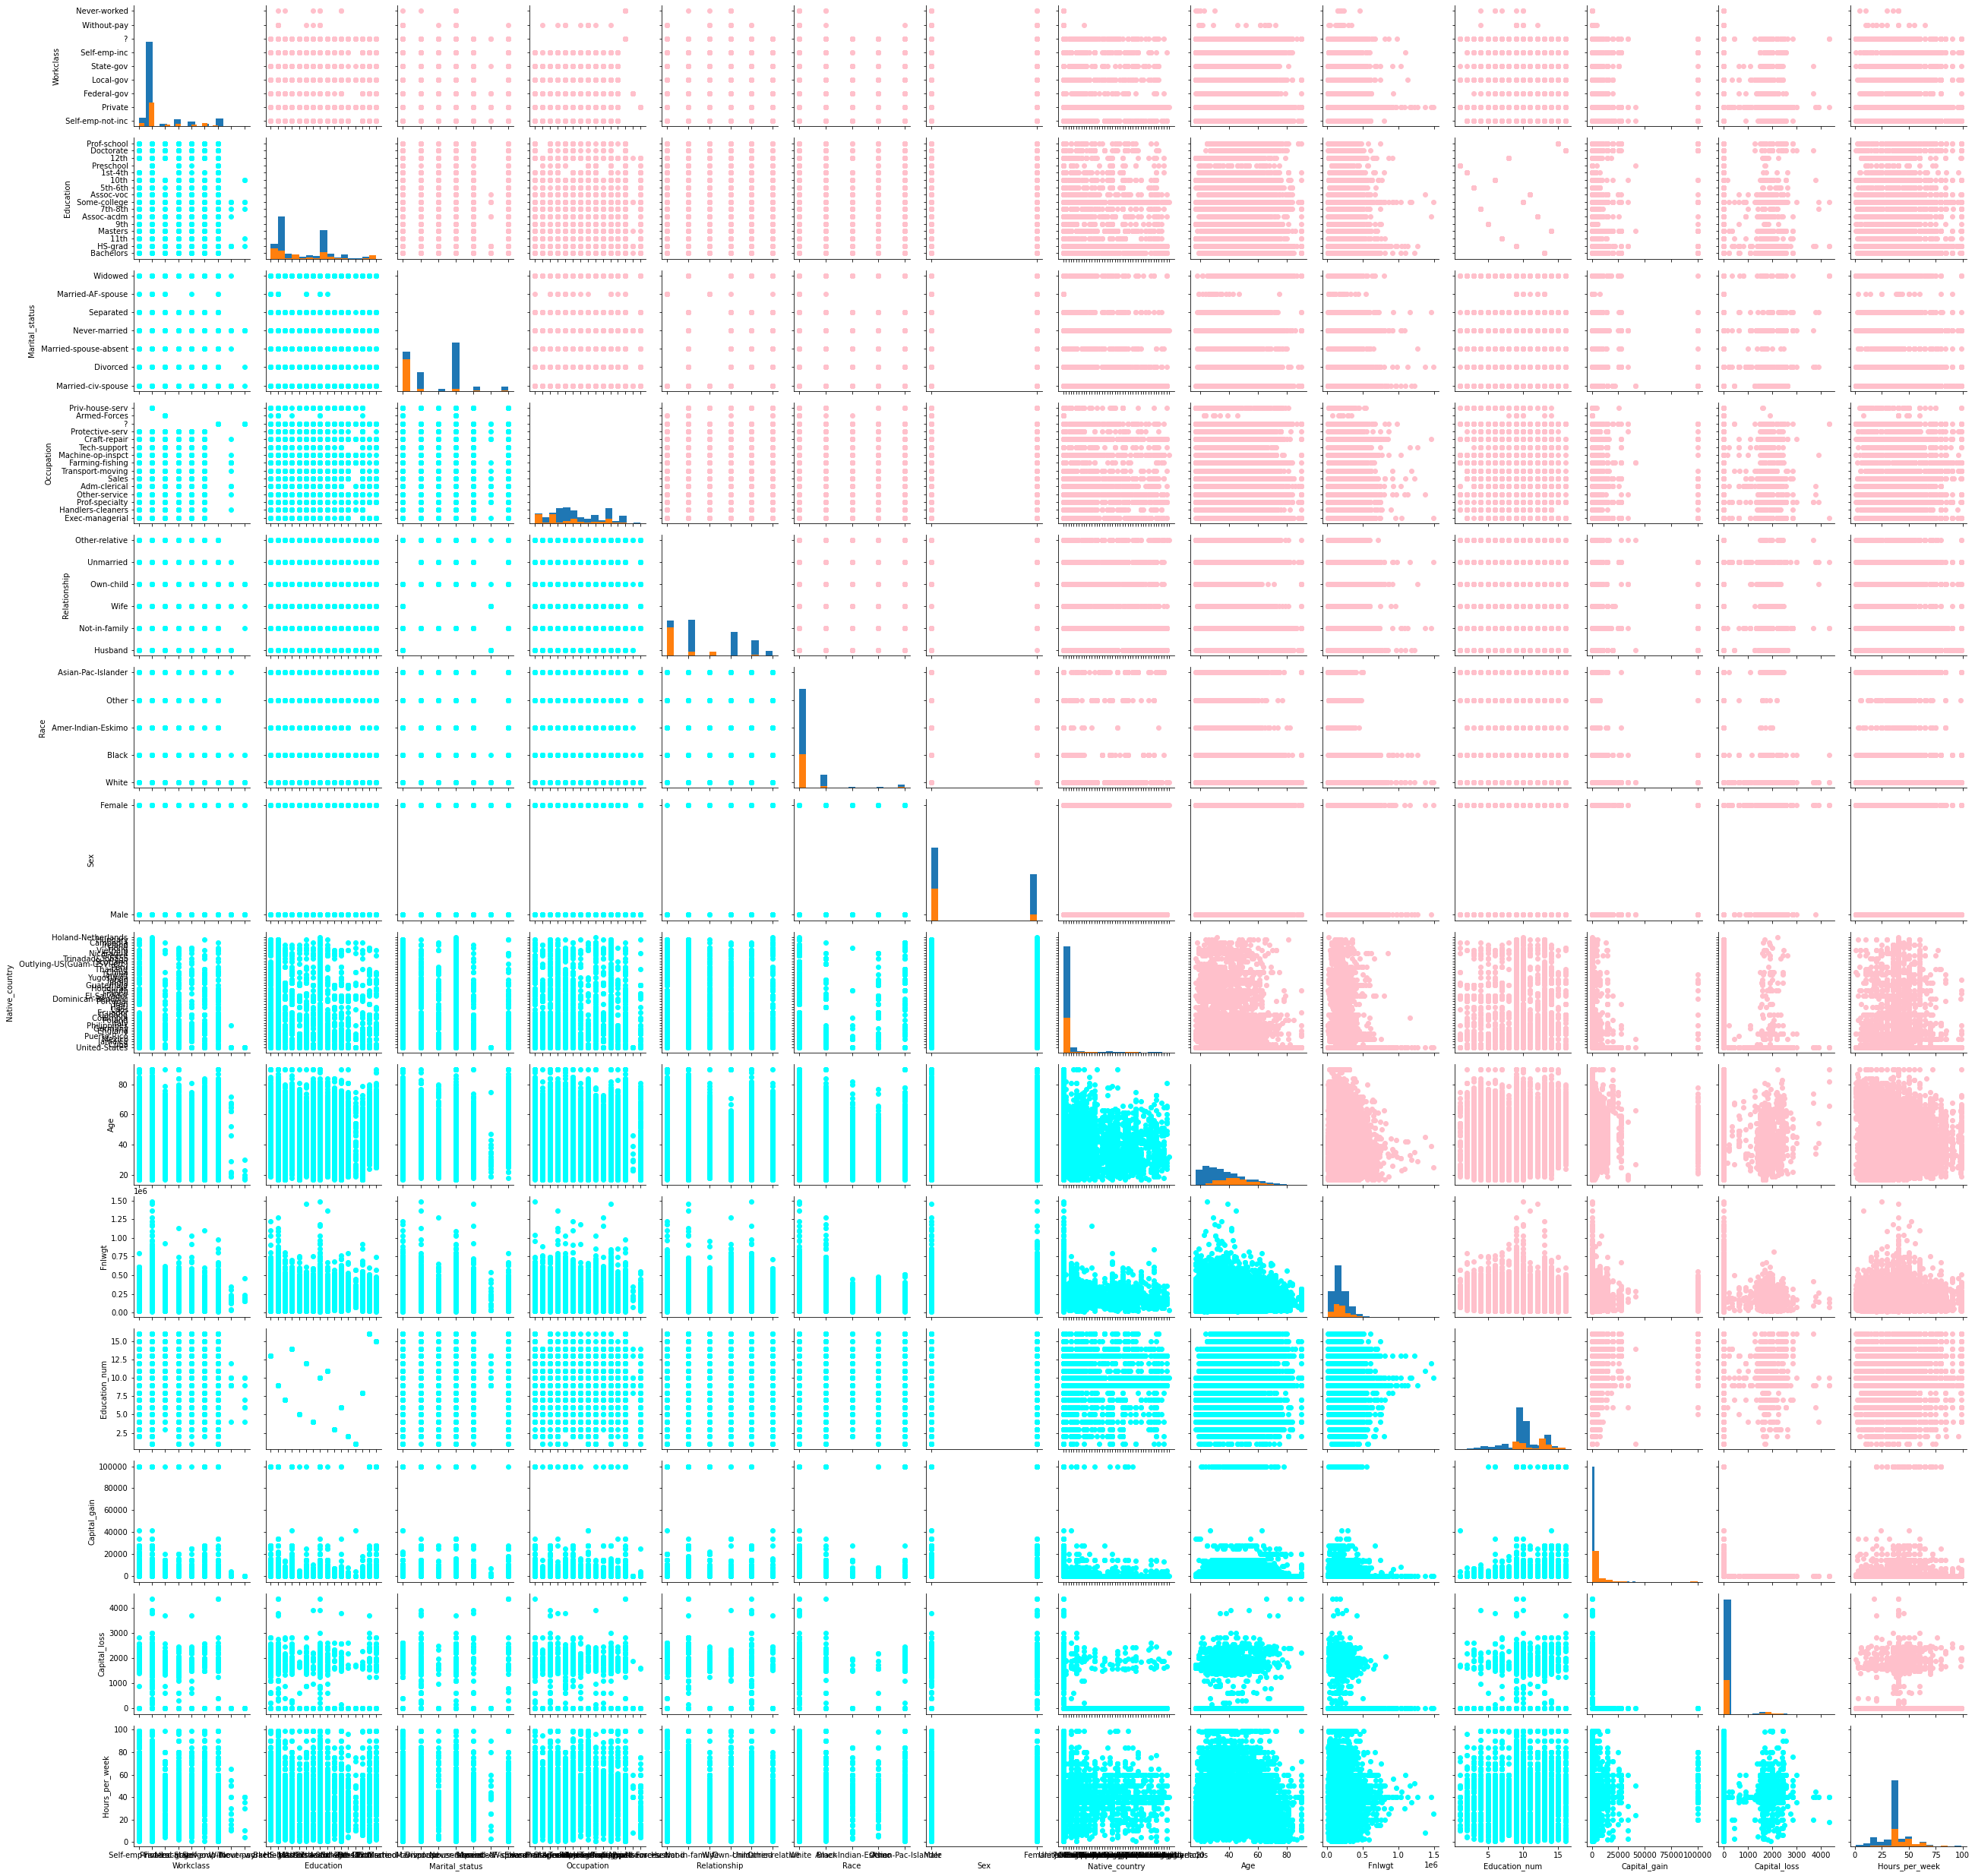

In [1264]:
g = sns.PairGrid(data=df,hue='Income', vars = ['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week'])  
g.map_lower(plt.scatter,color='aqua')  
g.map_diag(plt.hist, bins=15)  
g.map_upper(plt.scatter,color='pink')
plt.xticks(rotation=90)

In [1265]:
#4.---Continuous Vs Continuous

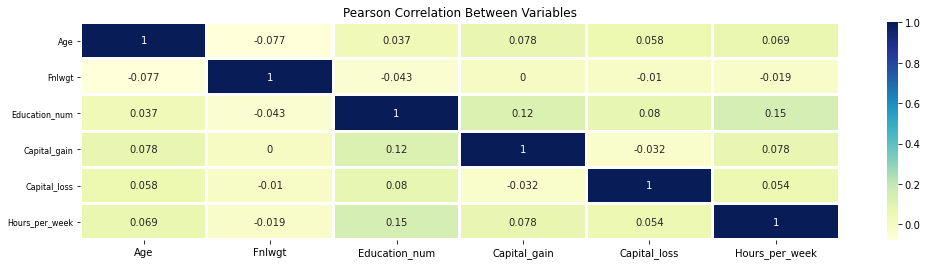

In [1343]:
pcorrel = df.corr(method='pearson').round(3)
plt.figure(figsize=(17,4)) 
sns.heatmap(pcorrel,xticklabels=pcorrel.columns,yticklabels=pcorrel.columns,cmap="YlGnBu",annot=True,linewidth=1.9)
plt.title("Pearson Correlation Between Variables")
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.show()        

###### Removing Duplicate Rows

In [1524]:
#Rows before droping duplicate rows
df.shape

(32560, 15)

In [1525]:
#Droping duplicate rows
df=df.drop_duplicates()

In [1526]:
#check Rows after droping duplicate rows
df.shape

(32536, 15)

###### Encoding Categorical Variables  and Reducing Cardinality

In [1527]:
#converting by Encoding 

In [1528]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Income']=le.fit_transform(df['Income'])
df['Race']=le.fit_transform(df['Race'])

In [1529]:
#check for converted unique values
print(df['Sex'].unique())
print(df['Income'].unique())

[1 0]
[0 1]


In [1530]:
#converting Marital Status in to numerical
df['Marital_status']=le.fit_transform(df['Marital_status'])
print("Encoded Marital Status values : ",df['Marital_status'].unique())

df.Marital_status.replace([2],1,inplace=True)
df.Marital_status.replace([0,3,5],2,inplace=True)
df.Marital_status.replace([4],0,inplace=True)
df.Marital_status.replace([6],3,inplace=True)
print("Reduced Cardinality of Marital Status :",df['Marital_status'].unique())

Encoded Marital Status values :  [2 0 3 4 5 1 6]
Reduced Cardinality of Marital Status : [1 2 0 3]


In [1531]:
#converting Relationship in to numerical
df['Relationship']=le.fit_transform(df['Relationship'])
print("Encoded Relationship values : ",df['Relationship'].unique())

df.Relationship.replace([4],1,inplace=True)
df.Relationship.replace([5],4,inplace=True)
print("Reduced Cardinality of Relationship :",df['Relationship'].unique())


Encoded Relationship values :  [0 1 5 3 4 2]
Reduced Cardinality of Relationship : [0 1 4 3 2]


In [1532]:
#converting Workclass in to numerical
df['Workclass']=le.fit_transform(df['Workclass'])
print("Encoded Workclass values : ",df['Workclass'].unique())

df.Workclass.replace([7,1],2,inplace=True)
df.Workclass.replace([8,3],1,inplace=True)
df.Workclass.replace([5,6],3,inplace=True)
print("Reduced Cardinality of Workclass :",df['Workclass'].unique())

Encoded Workclass values :  [6 4 7 1 2 0 5 8 3]
Reduced Cardinality of Workclass : [3 4 2 0 1]


In [1533]:
#converting Education in to numerical
df['Education']=le.fit_transform(df['Education'])
print("Encoded Education values : ",df['Education'].unique())

df.Education.replace([13,3,4,5,6,1,2],0,inplace=True)
df.Education.replace([11],1,inplace=True)
df.Education.replace([15],2,inplace=True)
df.Education.replace([7,8],3,inplace=True)
df.Education.replace([9],4,inplace=True)
df.Education.replace([12],5,inplace=True)
df.Education.replace([14],6,inplace=True)
df.Education.replace([10],7,inplace=True)
print("Reduced Cardinality of Education :",df['Education'].unique())

Encoded Education values :  [ 9 11  1 12  6 15  7  8  5 10 14  4  0  3 13  2]
Reduced Cardinality of Education : [4 1 0 5 2 3 7 6]


In [1534]:
#converting Education in to numerical
df['Occupation']=le.fit_transform(df['Occupation'])
print("Encoded Occupation values : ",df['Occupation'].unique())

df.Occupation.replace([13,11],0,inplace=True)
df.Occupation.replace([6,5,7,14],3,inplace=True)
df.Occupation.replace([10],5,inplace=True)
df.Occupation.replace([9,8],6,inplace=True)
df.Occupation.replace([12],7,inplace=True)
print("Reduced Cardinality of Occupation : ",df['Occupation'].unique())

Encoded Occupation values :  [ 4  6 10  8  1 12  3 14  5  7 13  0 11  2  9]
Reduced Cardinality of Occupation :  [4 3 5 6 1 7 0 2]


In [1535]:
#converting Native_country in to numerical
df['Native_country']=le.fit_transform(df['Native_country'])
print("Encoded Native_country values : ",df['Native_country'].unique())

df.Native_country.replace([20,24,5],0,inplace=True)
df.Native_country.replace([25,30,37,40],1,inplace=True)
df.Native_country.replace([9,19,21,34],2,inplace=True)
df.Native_country.replace([17,36],3,inplace=True)
df.Native_country.replace([7,8,29],4,inplace=True)
df.Native_country.replace([10,11,15,22],5,inplace=True)
df.Native_country.replace([13,14,18,23,26,27,28,33,38],6,inplace=True)
df.Native_country.replace([12,16,31,32,35,41],7,inplace=True)
df.Native_country.replace([39],8,inplace=True)
print("Reduced Cardinality of Native_country : ",df['Native_country'].unique())     

Encoded Native_country values :  [39  5 23 19  0 26 35 33 16  9  2 11 20 30 22 31  4  1 37  7 25 36 14 32
  6  8 10 13  3 24 41 29 28 34 38 12 27 40 17 21 18 15]
Reduced Cardinality of Native_country :  [8 0 6 2 7 5 1 4 3]


In [1536]:
#Recheck for Unique values
for feature in df[['Sex','Income','Marital_status','Relationship','Race','Workclass','Education','Occupation','Native_country']]:
    print(feature," : ", df[feature].unique())

Sex  :  [1 0]
Income  :  [0 1]
Marital_status  :  [1 2 0 3]
Relationship  :  [0 1 4 3 2]
Race  :  [4 2 1 0 3]
Workclass  :  [3 4 2 0 1]
Education  :  [4 1 0 5 2 3 7 6]
Occupation  :  [4 3 5 6 1 7 0 2]
Native_country  :  [8 0 6 2 7 5 1 4 3]


*Observation :*<br>*All categorical variable are converted into numerical values*

###### Handling Zeros in colummns

In [1537]:
df.drop(['Capital_gain','Capital_loss'],inplace=True,axis=1)

*Observation :*<br>*these columns have 90 to 95 % data in zero values and have high cardinality that why removed*

###### Handling Outliers

In [1538]:
# remove outliers from Continuous Features

fout = ['Age','Fnlwgt','Education_num','Hours_per_week']
for f in fout:
    q1 = df[f].quantile(0.25)
    q3 = df[f].quantile(0.75)
    IQR = q3-q1
    lolimit = q1 - (IQR*1.5)
    uplimit = q3 + (IQR*1.5)
    df.loc[df[f]<lolimit,f] = lolimit
    df.loc[df[f]>uplimit,f] = uplimit


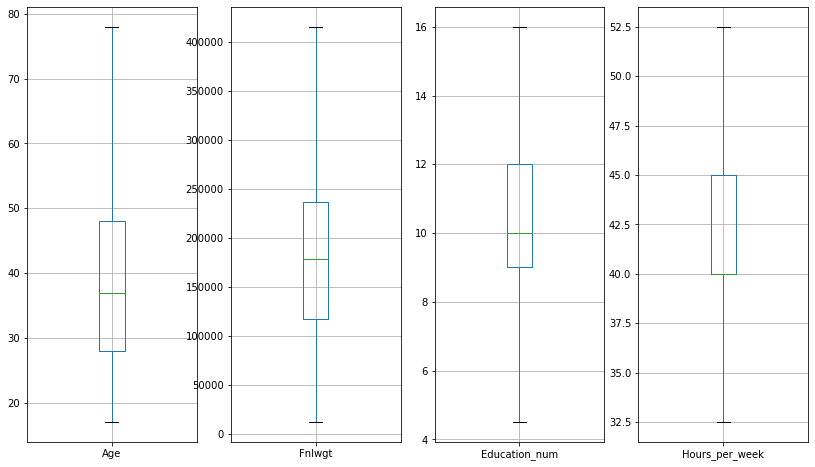

In [1539]:
fig, pltcan=plt.subplots(nrows=1, ncols=len(fout), figsize=(14,8))
for predcol , i in zip(fout, range(len(fout))):
    df.boxplot(column=predcol, figsize=(2,10), vert=True, ax=pltcan[i])

In [1540]:
df.shape

(32536, 13)

*Observation :*<br>*From all columns Outliers Removed*

###### Removing Skewness

In [1541]:
df[['Age']]= np.sqrt(df[['Age']])
df[['Fnlwgt']]= np.sqrt(df[['Fnlwgt']])

In [1542]:
#Recheck for skewness
df[['Age','Fnlwgt']].skew()

Age       0.180460
Fnlwgt   -0.133322
dtype: float64

*Observation :*<br>*Skewness removed*

In [1543]:
df.shape

(32536, 13)

###### Feature Selection

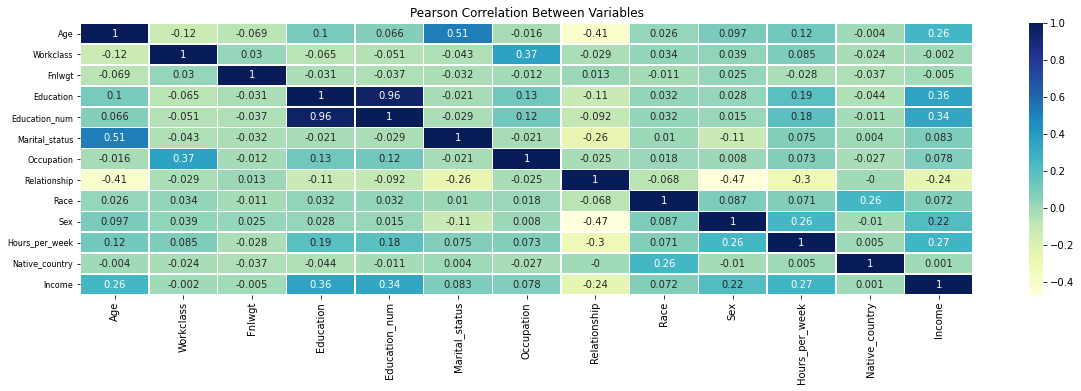

In [1544]:
# Variable Correlation
pcorrel = df.corr(method='pearson').round(3)
plt.figure(figsize=(20,5)) 
sns.heatmap(pcorrel,xticklabels=pcorrel.columns,yticklabels=pcorrel.columns,cmap="YlGnBu",annot=True,linewidth=0.5)
plt.title("Pearson Correlation Between Variables")
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.show()        

###### split target and feature variables

In [1545]:
y_train=df[['Income']]
X_train=df.drop(['Income'],axis=1)

print("y_train :",y_train.shape)
print("X_train :",X_train.shape)

y_train : (32536, 1)
X_train : (32536, 12)


[0.20361378 0.03451079 0.23424083 0.06770439 0.07213085 0.0668136
 0.07586773 0.09425208 0.01782528 0.0288277  0.08431372 0.01989924]


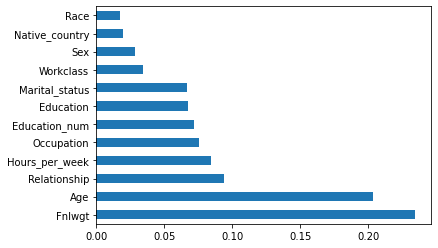

In [1546]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

In [1547]:
#droping Features

In [1548]:
X_train.drop(['Race','Workclass','Education_num','Marital_status'],inplace=True,axis=1)

In [1549]:
X_train.shape

(32536, 8)

In [1550]:
#selected features

In [1551]:
X_train.columns

Index(['Age', 'Fnlwgt', 'Education', 'Occupation', 'Relationship', 'Sex',
       'Hours_per_week', 'Native_country'],
      dtype='object')

In [1552]:
y_train.columns

Index(['Income'], dtype='object')

###### Normalization

In [1553]:
from sklearn.preprocessing import power_transform
X=power_transform(X_train,method='yeo-johnson')
X

array([[ 0.89419811, -1.12223196,  1.14712737, ...,  0.70303571,
        -1.58798172,  0.33895728],
       [ 0.0990518 ,  0.40424056, -0.58881716, ...,  0.70303571,
        -0.08693053,  0.33895728],
       [ 1.068679  ,  0.58373711, -1.72016084, ...,  0.70303571,
        -0.08693053,  0.33895728],
       ...,
       [ 1.34258709, -0.25392217, -0.58881716, ..., -1.42240286,
        -0.08693053,  0.33895728],
       [-1.35741588,  0.26644729, -0.58881716, ...,  0.70303571,
        -1.58798172,  0.33895728],
       [ 1.01142071,  1.05293378, -0.58881716, ..., -1.42240286,
        -0.08693053,  0.33895728]])

###### splitting in train and test set

In [1554]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y_train, test_size = 0.25, random_state = 44)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(24402, 8)
(24402, 1)
(8134, 8)
(8134, 1)


###### Standarization

In [1555]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
print(x_train)
x_test = sc.fit_transform(x_test)
print(x_test)

[[ 0.37972345 -1.18327652  1.1438724  ...  0.70352383 -0.08866944
   0.34076482]
 [-0.13485277  0.67586684 -0.58992398 ...  0.70352383 -0.08866944
  -3.09071941]
 [ 0.24015509  0.54834041  0.14125946 ...  0.70352383 -0.08866944
   0.34076482]
 ...
 [-0.05658339  1.85883726 -0.58992398 ...  0.70352383  1.35193651
   0.34076482]
 [-0.55521353 -1.2411863   0.69425188 ...  0.70352383 -0.08866944
   0.34076482]
 [-1.99119944 -0.35465362 -1.71986768 ...  0.70352383 -1.59185905
   0.34076482]]
[[-0.36497043 -1.05469509 -0.58549756 ... -1.42537046 -0.08174562
   0.33350057]
 [ 0.11153715  0.35751398 -1.72109579 ... -1.42537046 -0.08174562
   0.33350057]
 [-1.9779038   1.32665418 -1.72109579 ...  0.701572   -1.57645901
   0.33350057]
 ...
 [-1.70997403 -0.96093106  0.14934492 ... -1.42537046 -1.57645901
   0.33350057]
 [-0.53961778  0.0829872   0.14934492 ... -1.42537046 -0.08174562
  -3.18046741]
 [ 0.25702484  0.24506823  1.8745207  ... -1.42537046 -1.57645901
   0.33350057]]


In [1556]:
#MOdel BUilding

In [1557]:
models=[]
models1 = []
models2=[]

Z = [DecisionTreeClassifier() , LogisticRegression() , KNeighborsClassifier() ,
    RandomForestClassifier() , GradientBoostingClassifier(),AdaBoostClassifier(), GaussianNB()]
X = ["DecisionTreeClassifier" , "LogisticRegression" , "KNeighborsClassifier" ,
    "RandomForestClassifier" , "GradientBoostingClassifier","AdaBoostClassifier","Naive Bays"]
for i in range(0,len(Z)):
    model = Z[i]
    model=model.fit( x_train , y_train )
    pred = model.predict(x_test)
    models.append(accuracy_score(pred , y_test))
    models1.append(model.score(x_train , y_train))


In [1558]:
d = {"Training Accuracy":models1,"Testing Accuracy" : models}
data_frame = pd.DataFrame(d,index=X)
data_frame

,Training Accuracy,Testing Accuracy
DecisionTreeClassifier,0.999221,0.773174
LogisticRegression,0.816777,0.817679
KNeighborsClassifier,0.867060,0.812884
RandomForestClassifier,0.999180,0.823949
GradientBoostingClassifier,0.842390,0.838579
AdaBoostClassifier,0.835833,0.835136
Naive Bays,0.798172,0.794566


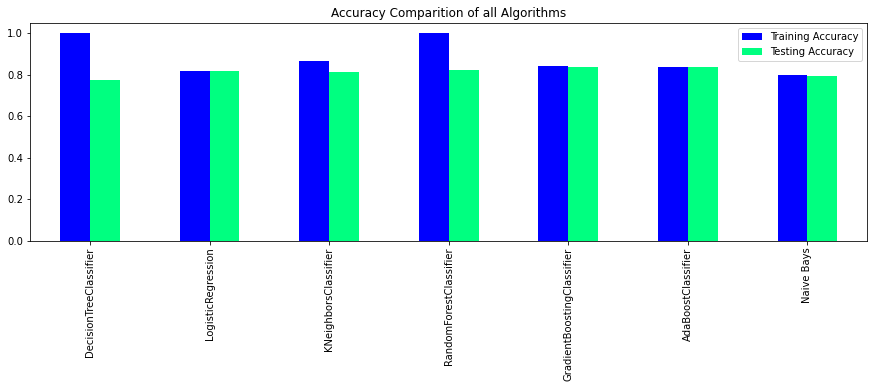

In [1559]:
data_frame.plot(kind='bar',figsize=(15,4),title='Accuracy Comparition of all Algorithms',colormap='winter')
plt.show()

###### Evaluation

In [1560]:
#Classification Report

In [1561]:
models2=[]
models3=[]
for i in range(0,len(Z)):
    model = Z[i]
    model=model.fit( x_train , y_train )
    pred = model.predict(x_test)
    Class_Report=metrics.classification_report(y_test, pred)
    models2.append(Class_Report)
    print("Model Name :",model,"\n",Class_Report)
    f1sc=metrics.f1_score(y_test, pred, average='weighted')
    models3.append(f1sc)
    print("Testing Accuracy of Data with Model",model,":",round(f1sc,2),"\n")

Model Name : DecisionTreeClassifier() 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      6212
           1       0.52      0.55      0.54      1922

    accuracy                           0.77      8134
   macro avg       0.69      0.70      0.69      8134
weighted avg       0.78      0.77      0.78      8134

Testing Accuracy of Data with Model DecisionTreeClassifier() : 0.78 

Model Name : LogisticRegression() 
               precision    recall  f1-score   support

           0       0.85      0.93      0.89      6212
           1       0.67      0.46      0.54      1922

    accuracy                           0.82      8134
   macro avg       0.76      0.69      0.71      8134
weighted avg       0.80      0.82      0.81      8134

Testing Accuracy of Data with Model LogisticRegression() : 0.81 

Model Name : KNeighborsClassifier() 
               precision    recall  f1-score   support

           0       0.87      0.89      0.

In [1562]:
d2 = {"Accuracy of Testing Data" : models3}
data_frame2 = pd.DataFrame(d2,index=X)
data_frame2

,Accuracy of Testing Data
DecisionTreeClassifier,0.775999
LogisticRegression,0.805204
KNeighborsClassifier,0.809663
RandomForestClassifier,0.817103
GradientBoostingClassifier,0.830928
AdaBoostClassifier,0.827700
Naive Bays,0.801508


In [1563]:
# Confusion Matrix

In [1564]:
cmodel=[]
for i in range(0,len(Z)):
    model = Z[i]
    model=model.fit( x_train , y_train )
    pred = model.predict(x_test)
    cm = np.array(confusion_matrix(y_test, pred, labels=[1,0]))
    cmodel.append(cm)
 
dc={"Confusion Matrix":cmodel}    
conf_mat=pd.DataFrame(dc,index=X)

conf_mat

,Confusion Matrix
DecisionTreeClassifier,"[[1056, 866], [974, 5238]]"
LogisticRegression,"[[884, 1038], [445, 5767]]"
KNeighborsClassifier,"[[1072, 850], [672, 5540]]"
RandomForestClassifier,"[[1082, 840], [617, 5595]]"
GradientBoostingClassifier,"[[1046, 876], [437, 5775]]"
AdaBoostClassifier,"[[1041, 881], [460, 5752]]"
Naive Bays,"[[1313, 609], [1062, 5150]]"


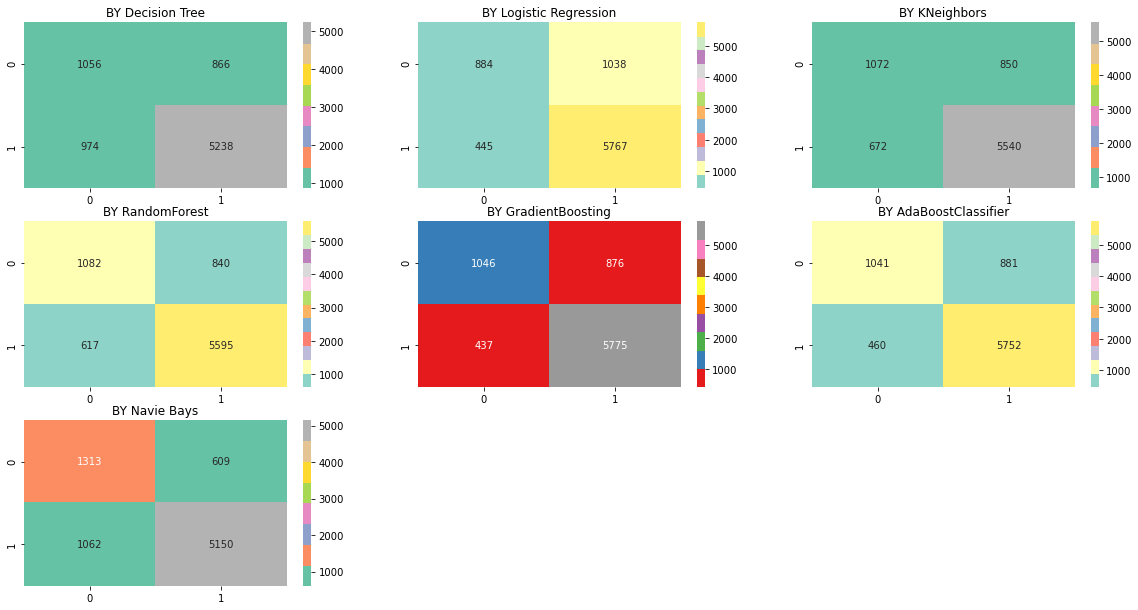

In [1565]:
plt.figure(figsize=(20,25))
plt.subplot(7,3,1)
sns.heatmap(cmodel[0],annot=True,fmt='g',cmap='Set2')
plt.title("BY Decision Tree")
plt.subplot(7,3,2)
sns.heatmap(cmodel[1],annot=True,fmt='g',cmap='Set3')
plt.title("BY Logistic Regression")
plt.subplot(7,3,3)
sns.heatmap(cmodel[2],annot=True,fmt='g',cmap='Set2')
plt.title("BY KNeighbors")  
plt.subplot(7,3,4)
sns.heatmap(cmodel[3],annot=True,fmt='g',cmap='Set3')
plt.title("BY RandomForest")
plt.subplot(7,3,5)
sns.heatmap(cmodel[4],annot=True,fmt='g',cmap='Set1')
plt.title("BY GradientBoosting")
plt.subplot(7,3,6)
sns.heatmap(cmodel[5],annot=True,fmt='g',cmap='Set3')
plt.title("BY AdaBoostClassifier")
plt.subplot(7,3,7)
sns.heatmap(cmodel[6],annot=True,fmt='g',cmap='Set2')
plt.title("BY Navie Bays")
plt.show()   


###### Validation

In [1217]:
#Cross validation

In [1566]:
vmodel=[]
acvalmodel=[]
for i in range(0,len(Z)):
    model = Z[i]
    model.fit( x_train , y_train )
    pred = model.predict(x_test)
    acval=cross_val_score(model,x_train , y_train, cv=10, scoring='f1_weighted')
    acvalmodel.append(acval)
    print('\n',model,' 10-fold Cross Validation:')
    print('Accuracy value :',acval)
    vmodel.append(round(acval.mean(),2))
    print('Final Average Accuracy :',round(acval.mean(),3))
    


 DecisionTreeClassifier()  10-fold Cross Validation:
Accuracy value : [0.77500115 0.75707284 0.76358895 0.77446042 0.77998862 0.76241566
 0.76957903 0.76814992 0.7733274  0.7844619 ]
Final Average Accuracy : 0.771

 LogisticRegression()  10-fold Cross Validation:
Accuracy value : [0.80763479 0.79639139 0.80155242 0.80933207 0.81089797 0.79633526
 0.80052229 0.79665002 0.80873803 0.80030414]
Final Average Accuracy : 0.803

 KNeighborsClassifier()  10-fold Cross Validation:
Accuracy value : [0.82364924 0.79935829 0.80992589 0.81066878 0.80499479 0.79762658
 0.79893581 0.79905066 0.80320289 0.81179044]
Final Average Accuracy : 0.806

 RandomForestClassifier()  10-fold Cross Validation:
Accuracy value : [0.82832968 0.80963115 0.80964415 0.81880976 0.8085436  0.80624426
 0.80690901 0.80935529 0.82026918 0.82106068]
Final Average Accuracy : 0.814

 GradientBoostingClassifier()  10-fold Cross Validation:
Accuracy value : [0.84054364 0.81586785 0.8286846  0.83590403 0.83127513 0.81839537
 0.8

In [1567]:
dv={"10 fold Cross Validation":acvalmodel,"Final Average Accuracy":vmodel}    
cross_val=pd.DataFrame(dv,index=X)
cross_val

,10 fold Cross Validation,Final Average Accuracy
DecisionTreeClassifier,"[0.7750011510934236, 0.7570728446413334, 0.763...",0.77
LogisticRegression,"[0.8076347852491849, 0.7963913855390898, 0.801...",0.80
KNeighborsClassifier,"[0.8236492409449141, 0.7993582945167924, 0.809...",0.81
RandomForestClassifier,"[0.8283296821771857, 0.8096311530339659, 0.809...",0.81
GradientBoostingClassifier,"[0.8405436429775509, 0.8158678500574179, 0.828...",0.83
AdaBoostClassifier,"[0.8428697751316403, 0.8216572932872147, 0.831...",0.83
Naive Bays,"[0.8181131514831562, 0.785307829704625, 0.8049...",0.80


In [1568]:
#visualization of final Accuracy

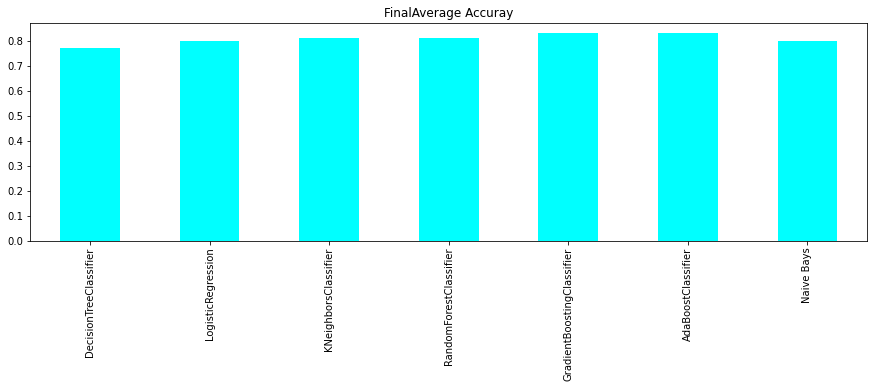

In [1569]:
cross_val['Final Average Accuracy'].plot(kind='bar',figsize=(15,4),title='FinalAverage Accuray',colormap='cool')
plt.show()

In [1570]:
#AUC_ROC Curve

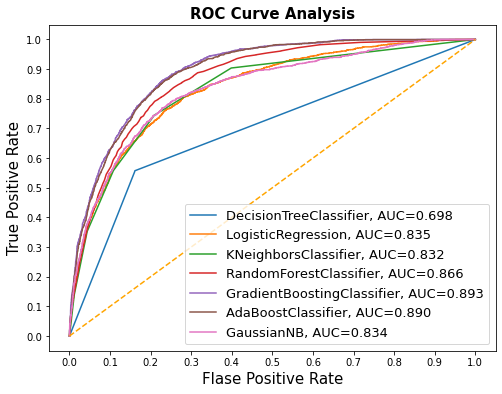

In [1571]:
result_table = pd.DataFrame(columns=['Z', 'fpr','tpr','auc'])
for i in range(0,len(Z)):
    model = Z[i]
    model=model.fit( x_train , y_train )
    ypred = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  ypred)
    auc = roc_auc_score(y_test, ypred)
    result_table = result_table.append({'model':model.__class__.__name__,'fpr':fpr,'tpr':tpr,'auc':auc},ignore_index=True)
result_table.set_index('model', inplace=True)

fig = plt.figure(figsize=(8,6))
for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],result_table.loc[i]['tpr'],label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.show()

###### Model Comparision

In [1572]:
dfcomp=pd.concat([data_frame,cross_val],axis=1)
dfcomp[['Training Accuracy','Testing Accuracy','Final Average Accuracy']].head(6)

,Training Accuracy,Testing Accuracy,Final Average Accuracy
DecisionTreeClassifier,0.999221,0.773174,0.77
LogisticRegression,0.816777,0.817679,0.80
KNeighborsClassifier,0.867060,0.812884,0.81
RandomForestClassifier,0.999180,0.823949,0.81
GradientBoostingClassifier,0.842390,0.838579,0.83
AdaBoostClassifier,0.835833,0.835136,0.83


<AxesSubplot:title={'center':'Accuracy Comparision'}>

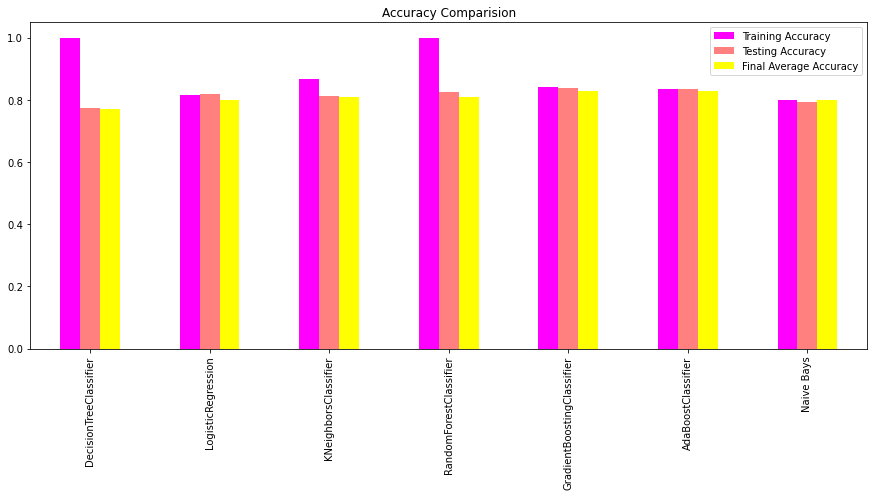

In [1574]:
dfcomp[['Training Accuracy','Testing Accuracy','Final Average Accuracy']].plot(kind='bar',figsize=(15,6),title='Accuracy Comparision',colormap='spring')

###### Hyperparameter Tuning

In [ ]:
#AdaBoost

In [1575]:
n_estimators=[2,4,6,8,10,12]
learning_rate=[1.5,3.4,5.6,9.2,10.2]
random_state=[1,5,10, 100,200,500]
algorithm=['SAMME','SAMME.R']

param_distributions = dict(n_estimators=n_estimators,
                           learning_rate=learning_rate,
                           random_state=random_state,
                           algorithm=algorithm)

random = RandomizedSearchCV(estimator=AdaBoostClassifier(),
                            param_distributions=param_distributions,
                            scoring='roc_auc',
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best Score:  0.8656132997349107
Best Params:  {'random_state': 1, 'n_estimators': 12, 'learning_rate': 1.5, 'algorithm': 'SAMME.R'}


###### Final Model

*Choosing the AdaBoost as Final Model*
<br>*AdaBoost Test Accuray,Train Accuracy and Final Accuracy Score is approx Equal *
<br>*final Accuracy is also higher than other models*
<br>*Best Score after Hyperparameter tuning is also high*

###### Retraining the Model

In [1576]:
#Full Dataset

In [1577]:
y_train=df[['Income']]
X_train=df.drop(['Income'],axis=1)

In [1578]:
PScaler=StandardScaler()
PScalerFit=PScaler.fit(X_train)
x_train=PScalerFit.transform(X_train)
print("x_train :",x_train.shape)
print("y_train :",y_train.shape)

x_train : (32536, 12)
y_train : (32536, 1)


In [1580]:
clf =AdaBoostClassifier(random_state=1,n_estimators=12,learning_rate=1.5,algorithm='SAMME.R')
finalSVC=clf.fit(x_train,y_train)
print("Accuracy :", finalSVC.score(x_train, y_train))

paccval=cross_val_score(finalSVC, x_train , y_train, cv=5, scoring='f1_weighted')
print('\n\nCross Validation')
print('Accuracy values:',paccval)
print('\nFinal Average Accuracy of the model:', round(paccval.mean(),2))

Accuracy : 0.8214285714285714


Cross Validation
Accuracy values: [0.80854226 0.81001615 0.80614598 0.82309865 0.80886315]

Final Average Accuracy of the model: 0.81


###### Model Saving

In [1584]:
import pickle
filename='CensusIncome.pk1'
pickle.dump(Ad,open(filename,'wb'))
print("Model Saved")

Model Saved
